<a href="https://colab.research.google.com/github/zeelShah-12/Sentiment_Analysis_Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install missing packages
!pip install nltk wordcloud scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import kagglehub
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)

# Load CSV
df = pd.read_csv(path + "/IMDB Dataset.csv")

# Check data
df.head()


Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Drop missing values
df.dropna(inplace=True)

# Convert to lowercase and clean text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove numbers & punctuation
    words = nltk.word_tokenize(text)  # tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


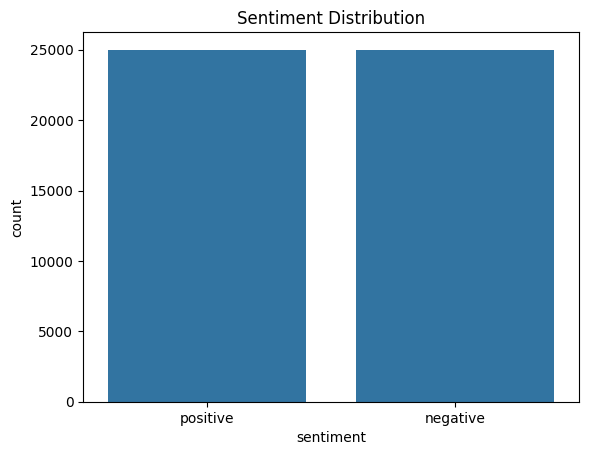

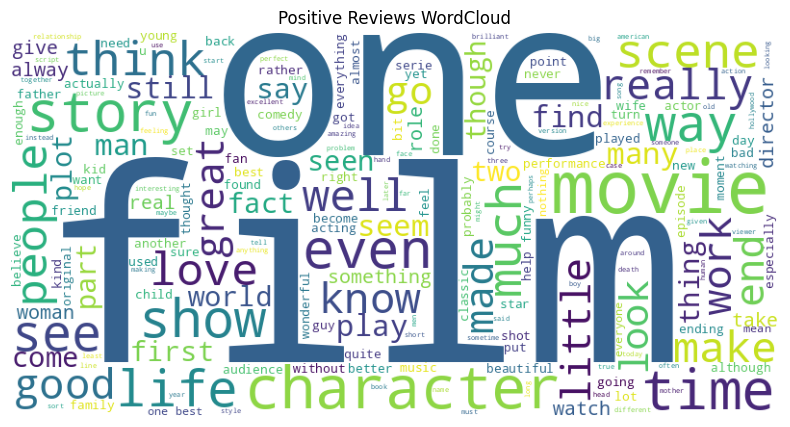

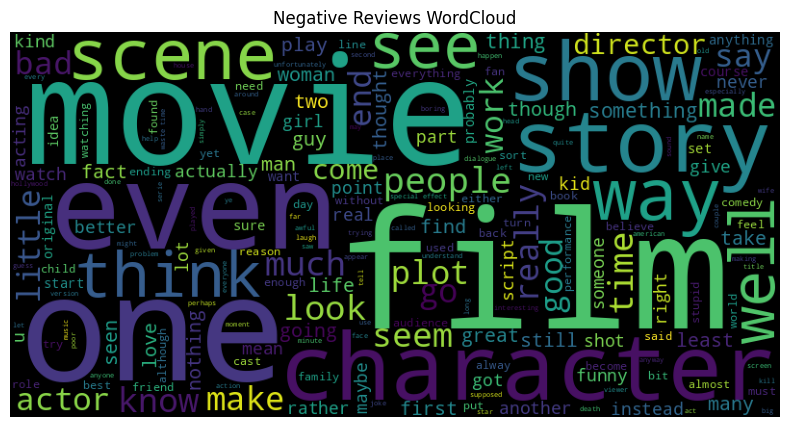

In [ ]:
# Plot class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# WordCloud for positive reviews
pos_text = " ".join(df[df['sentiment']=='positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

# WordCloud for negative reviews
neg_text = " ".join(df[df['sentiment']=='negative']['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()


In [ ]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x=="positive" else 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.8891
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



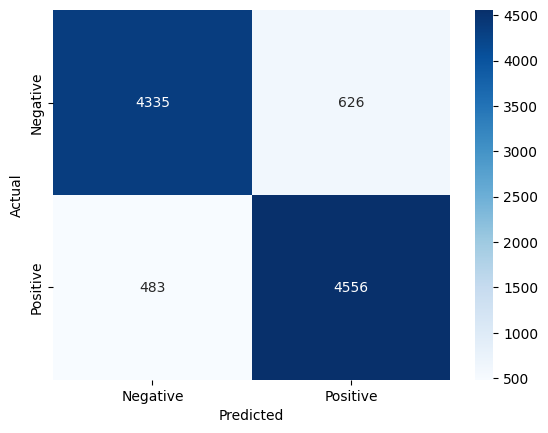

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
def predict_sentiment(text):
    text = clean_text(text)
    vec = tfidf.transform([text])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

# Test your own
print(predict_sentiment("I absolutely loved this movie, it was amazing!"))
print(predict_sentiment("The film was boring and too long."))


Positive
Negative


In [ ]:
!pip install transformers

from transformers import pipeline

# Load pre-trained DistilBERT sentiment analysis model
bert_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test a few sentences
print(bert_classifier("I absolutely loved this movie, it was amazing!"))
print(bert_classifier("The film was boring and too long."))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.999882698059082}]
[{'label': 'NEGATIVE', 'score': 0.9997709393501282}]


In [ ]:
def compare_models(text):
    lr_result = predict_sentiment(text)
    bert_result = bert_classifier(text)[0]['label']
    print(f"Review: {text}")
    print(f"Logistic Regression Prediction: {lr_result}")
    print(f"DistilBERT Prediction: {bert_result}")
    print("-" * 50)

# Try both
compare_models("This movie was a masterpiece, I loved every scene!")
compare_models("It was the worst film I've ever seen.")


Review: This movie was a masterpiece, I loved every scene!
Logistic Regression Prediction: Positive
DistilBERT Prediction: POSITIVE
--------------------------------------------------
Review: It was the worst film I've ever seen.
Logistic Regression Prediction: Negative
DistilBERT Prediction: NEGATIVE
--------------------------------------------------


In [ ]:
import joblib

joblib.dump(model, "sentiment_lr_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Models saved successfully!")


Models saved successfully!
